# Comparative Analysis
In this notebook, we compare the with different competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

In [3]:
from src.utils import load_mosad_dataset

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the benchmark dataset.

In [5]:
df_mosad = load_mosad_dataset()

Let's load the scores from the different methods.

In [6]:
competitors = ["ClaSP", "FLOSS", "BinSeg", "Window"]
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/competitor/{file_name}", usecols=["dataset", eval_score], compression="gzip")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,ClaSP,FLOSS,BinSeg,Window
0,Routine1_Subject1_X-Acc,0.452,0.246,0.248,0.436
1,Routine1_Subject1_X-Gyro,0.438,0.353,0.329,0.323
2,Routine1_Subject1_X-Mag,0.448,0.244,0.428,0.465
3,Routine1_Subject1_Y-Acc,0.713,0.341,0.513,0.258
4,Routine1_Subject1_Y-Gyro,0.440,0.353,0.312,0.284
5,Routine1_Subject1_Y-Mag,0.555,0.247,0.517,0.598
6,Routine1_Subject1_Z-Acc,0.569,0.251,0.420,0.457
7,Routine1_Subject1_Z-Gyro,0.444,0.256,0.341,0.494
8,Routine1_Subject1_Z-Mag,0.655,0.290,0.472,0.602
9,Routine1_Subject2_X-Acc,0.579,0.315,0.579,0.415


Let's calculate the mean/std score.

In [7]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4207/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ClaSP     0.740
FLOSS     0.562
BinSeg    0.629
Window    0.561
dtype: float64

In [8]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4207/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ClaSP     0.211
FLOSS     0.322
BinSeg    0.235
Window    0.186
dtype: float64

Let's compute the wins per method.

In [9]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [10]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ClaSP:wins=74 rank=1.57937
FLOSS:wins=17 rank=3.02381
BinSeg:wins=15 rank=2.52381
Window:wins=21 rank=2.86508


Let's plot and output the ranks.

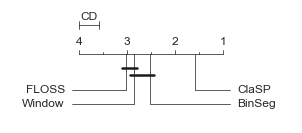

In [11]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4, filename=f"../figures/cd_competitor.pdf")

Let's compute wins/losses against ClaSP.

In [12]:
selection = "ClaSP"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSP vs FLOSS: (wins/ties/losses): 101/0/25
ClaSP vs BinSeg: (wins/ties/losses): 102/1/23
ClaSP vs Window: (wins/ties/losses): 101/0/25


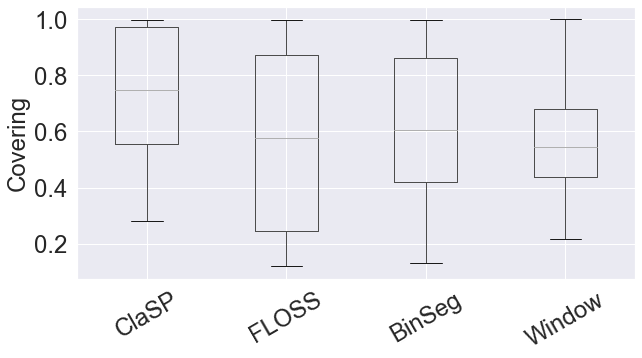

In [13]:
fontsize = 24
_, ax = plt.subplots(figsize=(10,5))

df_scores.boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.savefig(f"../figures/bp_competitor.pdf", bbox_inches="tight") 